In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import h5py

import sif
import jmstokes as st

# import importlib
# importlib.reload(st)

lambda0=900/400

pin_HE = sif.params_SIF(mode=sif.HE_MODE,
                     pp=2,  # azimuthal mode number
                     n_core=3.6,  # core index
                     n_clad=1,  # clad index
                     lambda0=lambda0  # wavelength
                     )
pin_HE.display(debug=True)

HE mode
mode number= 2
n_core= 3.6
n_clad= 1
wavelength= 2.25
k(=omega/c)= 2.792526803190927
delta= 0.46141975308641975
V= 9.657460490243555
betamin= 2.7928060558712464
betamax= 10.05209118183819


In [2]:
lows = np.arange(0, 1, 0.1)
highs = np.arange(0, 1, 0.1)

nbra = sif.find_brackets_HE(pin_HE, 101, lows, highs)
print('number of roots=', nbra)
beta = np.zeros(nbra)

for i in range(nbra):
    beta[i] = sif.findroot_HE(pin_HE, lows[i], highs[i])
    print("beta=", beta[i])


number of roots= 3
beta= 2.888522168520283
beta= 7.416123506246077
beta= 9.360639600091302


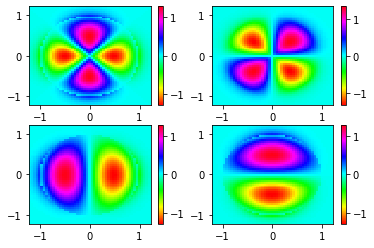

In [3]:
# for i in range(nbra):
#    pres = sif.results_SIF(beta[i], pin)
#    pres.display()

pres = sif.results_SIF(beta[nbra-1], pin_HE, phil=0)

x = np.linspace(-1.2, 1.2, 51)
y = np.linspace(-1.2, 1.2, 51)
X, Y = np.meshgrid(x, y)

Er = sif.Er_xy(pin_HE, pres, X, Y)
Ep = sif.Ep_xy(pin_HE, pres, X, Y)
Ex, Ey = sif.rt2xy(X, Y, Er, Ep)

fig, axs = plt.subplots(2, 2)

ax1 = axs[0, 0]
pcm1 = ax1.pcolor(X, Y, Er, cmap='hsv', shading='auto')
fig.colorbar(pcm1, ax=ax1, orientation="vertical")

ax2 = axs[0, 1]
pcm2 = ax2.pcolor(X, Y, Ep, cmap='hsv', shading='auto')
fig.colorbar(pcm2, ax=ax2, orientation="vertical")

ax3 = axs[1, 0]
pcm3 = ax3.pcolor(X, Y, Ex, cmap='hsv', shading='auto')
fig.colorbar(pcm3, ax=ax3, orientation="vertical")

ax4 = axs[1, 1]
pcm4 = ax4.pcolor(X, Y, Ey, cmap='hsv', shading='auto')
fig.colorbar(pcm4, ax=ax4, orientation="vertical")

plt.show()




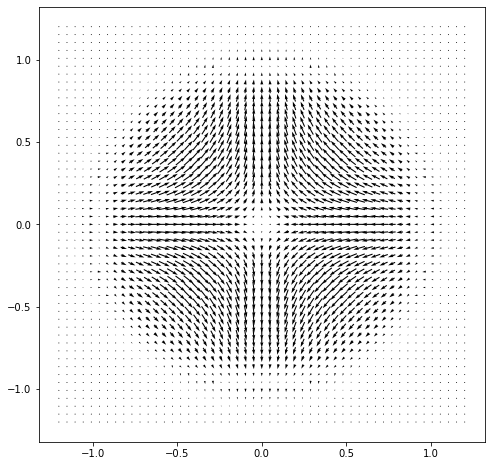

In [4]:
fig2=plt.figure(figsize=(8,8))
ax=fig2.add_subplot(111)
ax.quiver(X,Y,Ex,Ey,pivot='mid')
# plt.gca().set_aspect('equal')
# im = plt.quiver(X, Y, Ex, Ey, np.sqrt(Ex**2+Ey**2),cmap='Reds', scale=1, scale_units='xy')


In [6]:
s0,s1,s2,s3=st.SfromExEy(Ex,Ey)

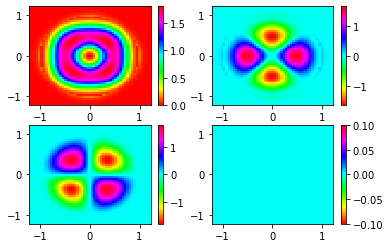

In [9]:
fig, axs = plt.subplots(2, 2)

ax1 = axs[0,0]
pcm1 = ax1.pcolor(X, Y, s0, cmap='hsv', shading='auto')
fig.colorbar(pcm1, ax=ax1, orientation="vertical")
ax2 = axs[0,1]
pcm2 = ax2.pcolor(X, Y, s1, cmap='hsv', shading='auto')
fig.colorbar(pcm2, ax=ax2, orientation="vertical")
ax3 = axs[1,0]
pcm3 = ax3.pcolor(X, Y, s2, cmap='hsv', shading='auto')
fig.colorbar(pcm3, ax=ax3, orientation="vertical")
ax4 = axs[1,1]
pcm4 = ax4.pcolor(X, Y, s3, cmap='hsv', shading='auto')
fig.colorbar(pcm4, ax=ax4, orientation="vertical")

# st.ShowStokesParams2D(s0,s1,s2,s3,X,Y)

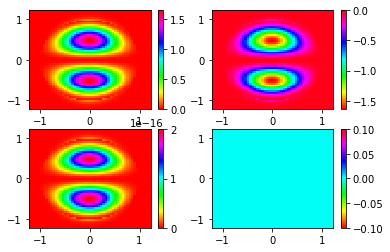

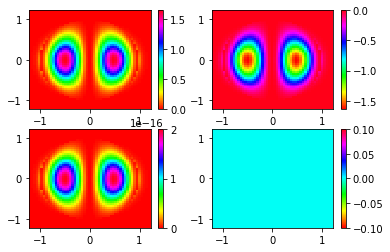

In [10]:
m1=np.dot(st.linear_polarizer(np.pi/2),st.HWP(0))
m2=np.dot(st.linear_polarizer(np.pi/2),st.HWP(np.pi/4))

s0_1,s1_1,s2_1,s3_1=st.MulMMSP(m1,s0,s1,s2,s3)
st.ShowStokesParams2D(s0_1,s1_1,s2_1,s3_1,X,Y)


s0_2,s1_2,s2_2,s3_2=st.MulMMSP(m2,s0,s1,s2,s3)
st.ShowStokesParams2D(s0_2,s1_2,s2_2,s3_2,X,Y)
